# 作業
### 用 iris (dataset.load_iris()) 資料嘗試跑 hierarchical clustering

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
plt.style.use('bmh')
import warnings
warnings.simplefilter('ignore')
from mpl_toolkits.mplot3d import Axes3D

In [2]:
from sklearn import datasets

iris = datasets.load_iris()
X = iris.data[:, 1:]
y = iris.target

print(X.shape, y.shape)
print(np.bincount(y))

(150, 3) (150,)
[50 50 50]


載入 相關套件 並 執行 hierarchical clustering 實驗 ...

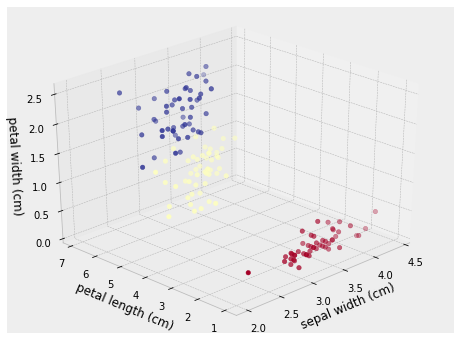

In [3]:
def plot_cluster(X, y, labels):
    fig = plt.figure(figsize=(8, 6))
    ax = fig.gca(projection='3d')
    ax.scatter(X[:, 0], X[:, 1], X[:, 2], c=y, cmap=plt.cm.RdYlBu)
    ax.set_xlabel(labels[0])
    ax.set_ylabel(labels[1])
    ax.set_zlabel(labels[2])
    ax.view_init(elev=30, azim=225)
    
plot_cluster(X, y, iris.feature_names[1:])

hc_ward accuracy = 0.873
hc_complete accuracy = 0.893
hc_average accuracy = 0.893


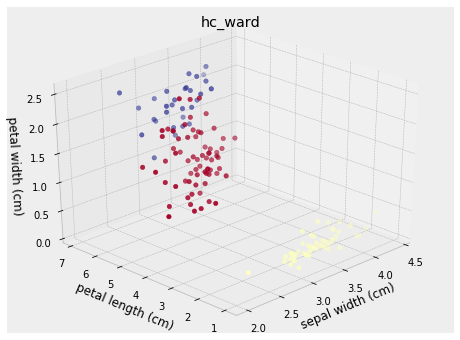

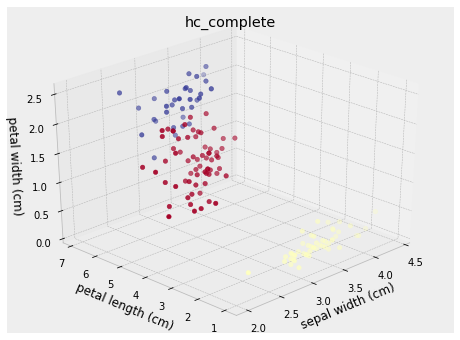

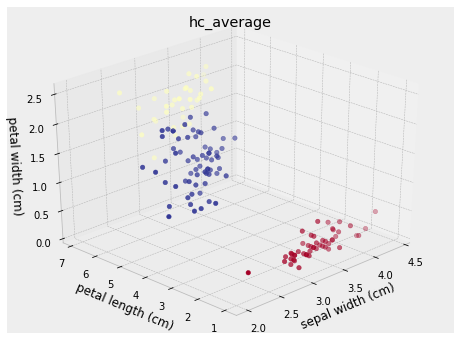

In [4]:
from sklearn.cluster import AgglomerativeClustering

estimators = [
    ('hc_ward', AgglomerativeClustering(n_clusters=3, linkage="ward")),
    ('hc_complete', AgglomerativeClustering(n_clusters=3, linkage="complete")),
    ('hc_average', AgglomerativeClustering(n_clusters=3, linkage="average"))]

for name, est in estimators:
    est.fit(X)
    labels = est.labels_
    plot_cluster(X, est.labels_, iris.feature_names[1:])
    ax = plt.gca()
    ax.set_title(name)
    
    if name == 'hc_ward' or name == 'hc_complete':
        errors = sum(labels[:50] != 1) + sum(labels[50:100] != 0) + sum(labels[100:] !=2)
    else:
        errors = sum(labels[:50] != 0) + sum(labels[50:100] != 2) + sum(labels[100:] !=1)
    print(f"{name} accuracy = {(150 - errors) / 150:.3f}")